In [1]:
from data_preprocess import *

In [2]:
DATA_PATH = 'open_data/train/'
CSV_PATH = 'open_data/train.csv'
dp = DataPreprocess(DATA_PATH, CSV_PATH)

In [3]:
dp.csvfile

,id,accent
0,common_voice_en_10047.wav,Africa
1,common_voice_en_10048.wav,Africa
2,common_voice_en_10049.wav,Africa
3,common_voice_en_10050.wav,Africa
4,common_voice_en_10051.wav,Africa
...,...,...
25515,common_voice_en_188356.wav,US
25516,common_voice_en_188361.wav,US
25517,common_voice_en_188364.wav,US
25518,common_voice_en_188366.wav,US


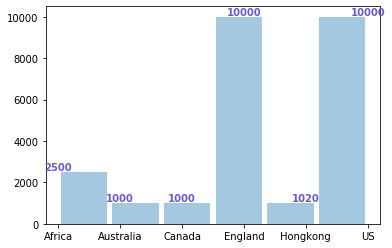

In [4]:
dp.hist_with_number(dp.csvfile['accent'])

0 africa
1 australia
2 canada
3 england
4 hongkong
5 us


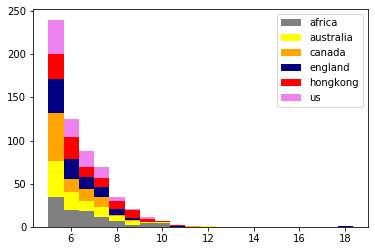

In [5]:
dp.hist_time(100)

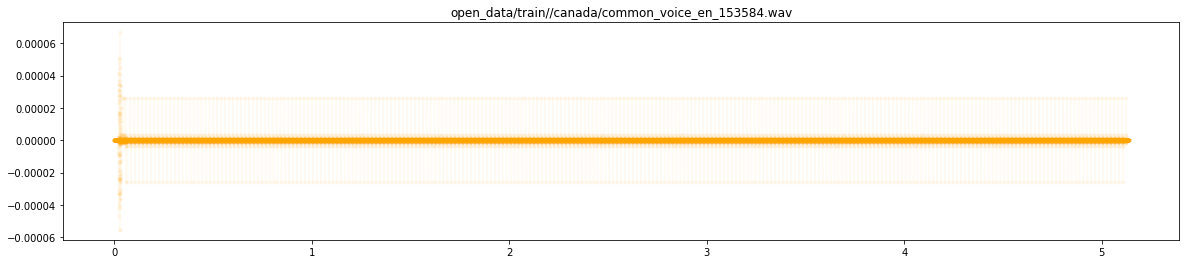

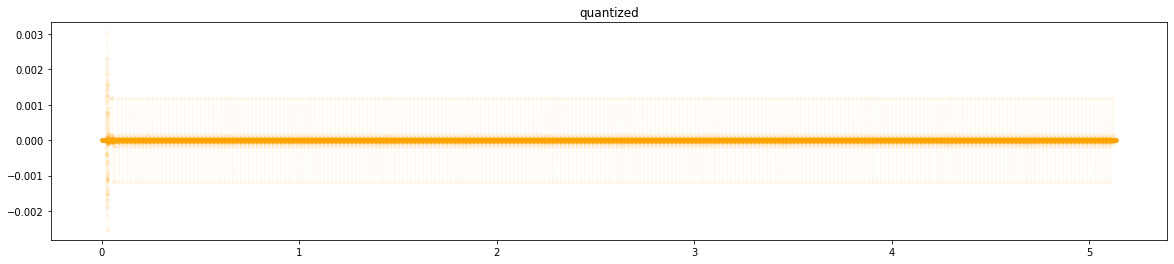

In [18]:
dp.draw_audio_with_quantized(2,7)

In [118]:
from draw_tools import *

def get_noise(y, noise_y_cond=0.1, noise_len_cond=1000):

    noise_count=0
    noise=[]
    for i in range(len(y)):
        val = y[i]
        if abs(val)<noise_y_cond:
            noise_count+=1
        else:
            if noise_count > noise_len_cond:
                noise.append([i-noise_count, i])
            noise_count=0
    noise.append([len(y)-noise_count, len(y)])

    return noise

def get_syllable(noise, syllable_extralen_cond=300, syllable_len_cond=500):

    syllable=[]
    for i in range(len(noise)-1):
        syllable_start, voise_end = noise[i][1], noise[i+1][0]
        syllable_lenth = voise_end-syllable_start
        if syllable_lenth > syllable_len_cond:
            syllable.append([syllable_start-syllable_extralen_cond,
                            syllable_lenth+2*syllable_extralen_cond])

    return syllable


def get_syllable_list(wav_list):
    syllable_list = []
    for wi, wav in enumerate(wav_list):
        
        x, t = dp.get_data_from_wav(wav)
        noise = get_noise(x)
        print(noise)
        syllables = get_syllable(noise)
        print(syllables)
        for syllable in syllables:
            syllable_list.append([wi, syllable[0], syllable[1]])
        if wi % 10 == 0:
            print('* Finish Idx %i wav file : '%wi, wav)

    syllable_list = np.array(syllable_list)
    return syllable_list

In [121]:
x_train, y_train = dp.data_process(100)
wav_list = dp.get_file_list(0)
sylla_list = get_syllable_list(wav_list[:10])

0 africa
1 australia
2 canada
3 england
4 hongkong
5 us
[[0, 13450], [20691, 22597], [26550, 27654], [29386, 31148], [35174, 36497], [39600, 41642], [43040, 44477], [50144, 54560], [54593, 59300], [61202, 62384], [62531, 64141], [68129, 69670], [70029, 72401], [73824, 75129], [75773, 77646], [79436, 96000]]
[[13150, 7841], [22297, 4553], [27354, 2332], [30848, 4626], [36197, 3703], [41342, 1998], [44177, 6267], [59000, 2502], [63841, 4588], [72101, 2023], [74829, 1244], [77346, 2390]]
* Finish Idx 0 wav file :  open_data/train//africa/common_voice_en_20532114.wav
[[0, 16821], [19243, 23348], [25952, 29554], [31354, 37841], [38975, 47367], [48140, 52726], [53724, 62845], [64155, 69501], [69782, 78241], [78243, 109056]]
[[16521, 3022], [23048, 3204], [29254, 2400], [37541, 1734], [47067, 1373], [52426, 1598], [62545, 1910]]
[[0, 10684], [15174, 16790], [25550, 27138], [37052, 38269], [38918, 40864], [46782, 48030], [58180, 61956], [63158, 65090], [68450, 70637], [70738, 72693], [74140, 8

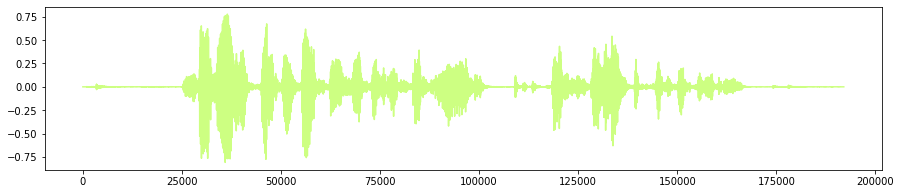

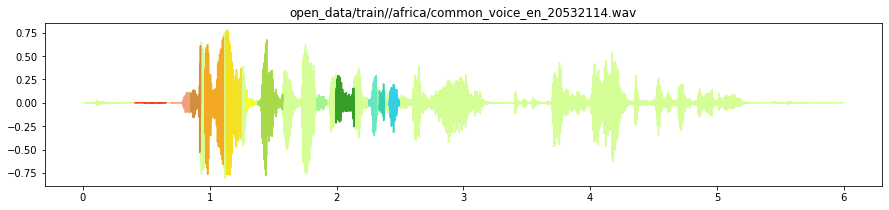

In [120]:
idx = 0
draw_wav(wav_list[idx])
draw_split_wav(wav_list[:10], sylla_list, idx)

In [59]:
x, t = dp.get_data_from_wav(wav_list[2])
noise = get_noise(x)
syllables = get_syllable(noise)

In [61]:
syllables

[[10315, 51270], [61526, 15208]]

In [10]:
x_train, y_train = dp.data_process(1000)
x_train.shape, y_train.shape

0 africa
1 australia
2 canada
3 england
4 hongkong
5 us


((6000,), (6000,))

In [127]:
x_train[4].shape

(84480,)